In [9]:
#Importamos librerias
import numpy as np
import matplotlib.pyplot as plt

In [10]:


#Declaramos listas de puntos experimentales. Deben estar ordenados!
#Pato
x_list = [0.9,1.3,1.9,2.1,2.6,3.0,3.9,4.4,4.7,5.0,6.0,7.0,8.0,9.2,10.5,11.3,11.6,12.0,12.6,13.0,13.3]
y_list = [1.3,1.5,1.85,2.1,2.6,2.7,2.4,2.15,2.05,2.1,2.25,2.3,2.25,1.95,1.4,0.9,0.7,0.6,0.5,0.4,0.25]

#perro
#x_list=[1,2,5,6,7,8,10,12,17,20,23,24,25,27,27.7,28,29,30]
#y_list=[3.0,3.7,3.9,4.2,5.7,6.6,7.1,6.7,4.5,7.0,6.1,5.6,5.8,5.2,4.1,4.3,4.1,3.0]

#x_list=[1,2,40.3]
#y_list=[0.1,2,3.3]



In [11]:
def TriDiagSolver(x_list,y_list):
    #Número de subintervalos
    n=len(x_list)-1 

    #Vector x_j, que almacenará los valores experimentales de x
    x = np.zeros(n+1)

    #Vectores de las constantes a_j, b_j, c_j, d_j
    a = np.zeros(n+1)
    b = np.zeros(n+1)
    c = np.zeros(n+1)
    d = np.zeros(n+1)

    #Los siguientes vectores se requieren para la solución del sistema tridiagonal
    l  = np.zeros(n+1)
    z  = np.zeros(n+1)
    mu = np.zeros(n+1)
    al = np.zeros(n+1)

    #Las n diferencias: x_j+1 - x_j se almacenan en el siguiente vector
    h = np.zeros(n)

    #Almacenamos el valor de las constantes a_j
    for i in range(0,n+1):
        a[i] = y_list[i]

    #Step 1, ver algoritmo 3.4 de Burden and Faires
    for i in range(0,n):
        h[i]=x_list[i+1]-x_list[i]

    #Step 2, ver algoritmo 3.4 de Burden and Faires
    #El vector al almacena las entradas del término a la derecha de la igualdad en la ec. matricial
    for i in range(1,n):
        al[i] = 3/h[i] * (a[i+1]-a[i]) - 3/h[i-1] * (a[i]-a[i-1])
    
    #Step 3, ver algoritmo 3.4 de Burden and Faires 
    l[0]  = 1
    mu[0] = 0
    z[0]  = 0

    #Step 4, ver algoritmo 3.4 de Burden and Faires 
    for i in range(1,n):
        l[i]  = 2*(x_list[i+1]-x_list[i-1]) - h[i-1]*mu[i-1]
        mu[i] = h[i]/l[i]
        z[i]  = (al[i]-h[i-1]*z[i-1])/l[i]

    #Step 5, ver algoritmo 3.4 de Burden and Faires 
    #Los extremos deben llenarse a mano
    l[n] = 1
    z[n] = 0
    c[n] = 0

    #Step 6, ver algoritmo 3.4 de Burden and Faires 
    for j in np.arange(n-1,-1,-1):
        c[j] = z[j]-mu[j]*c[j+1]
        b[j] = (a[j+1]-a[j])/h[j] - h[j]*(c[j+1]+2*c[j])/3
        d[j] = (c[j+1]-c[j])/(3*h[j])
    
    #El retorno de esta función es la solución al sistema tridiagonal, es decir el vector c
    #y los vectores a,b y d necesarios para construir el Spline.
    return [a,b,c,d]

In [12]:
def CubicSpline(x_list,y_list,x):
    #Desempaquetamos el retorno de la función TriDiagSolver 
    a=TriDiagSolver(x_list,y_list)[0]
    b=TriDiagSolver(x_list,y_list)[1]
    c=TriDiagSolver(x_list,y_list)[2]
    d=TriDiagSolver(x_list,y_list)[3]
    
    #Procedemos a hacer la interpolación
    n=len(x_list)-1
    
    for j in range(0,n): #Este cíclo se hace sobre cada subintervalo
        if x_list[j]<=x<x_list[j+1]:
            s = a[j]+b[j]*(x-x_list[j]) + c[j]*(x-x_list[j])**2 + d[j]*(x-x_list[j])**3
        elif x==x_list[n]:      
            s = a[n]+b[n]*(x-x_list[n]) + c[n]*(x-x_list[n])**2 + d[n]*(x-x_list[n])**3
    
    return s


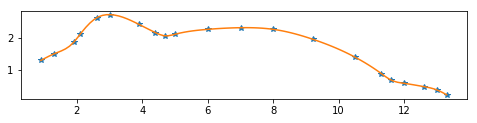

In [13]:


#Prueba
x_interpolado=np.linspace(min(x_list),max(x_list),100)
y_interpolado=[]

#Generamos los puntos interpolados
for i in range (0,len(x_interpolado)):
    y_interpolado.append(CubicSpline(x_list,y_list,x_interpolado[i]))
    

#Graficación
fig=plt.figure(figsize=(8,8))
ax=plt.axes()
ax.plot(x_list,y_list,'*')
ax.plot(x_interpolado,y_interpolado,'-')
ax.set_aspect('equal')

